In [2]:
import pandas as pd

In [3]:
# Load the dataset
file_path = "TASK-ML-INTERN.csv"
df = pd.read_csv(file_path)

In [4]:
# 1. Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Total Missing Values: {missing_values}")

Total Missing Values: 0


In [5]:
# 2. Basic statistics for numerical columns (to detect outliers)
print("\nSummary Statistics:")
print(df.describe())

# 3. Check unique `hsi_id` values (should be unique identifiers)
unique_hsi_ids = df["hsi_id"].nunique()
print(f"\nUnique hsi_id count: {unique_hsi_ids}")

# 4. Check `vomitoxin_ppb` range for inconsistencies
vomitoxin_min = df["vomitoxin_ppb"].min()
vomitoxin_max = df["vomitoxin_ppb"].max()
print(f"\nVomitoxin_ppb Range: {vomitoxin_min} to {vomitoxin_max}")


Summary Statistics:
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.405868    0.399815    0.394038    0.389664  ...    0.741255   
std      0.044528    0.0437

In [6]:

duplicate_ids = df["hsi_id"].value_counts()
duplicates = duplicate_ids[duplicate_ids > 1]

print(f"Total Duplicate hsi_id: {len(duplicates)}")
print(duplicates)


Total Duplicate hsi_id: 3
hsi_id
imagoai_corn_385    2
imagoai_corn_395    2
imagoai_corn_443    2
Name: count, dtype: int64


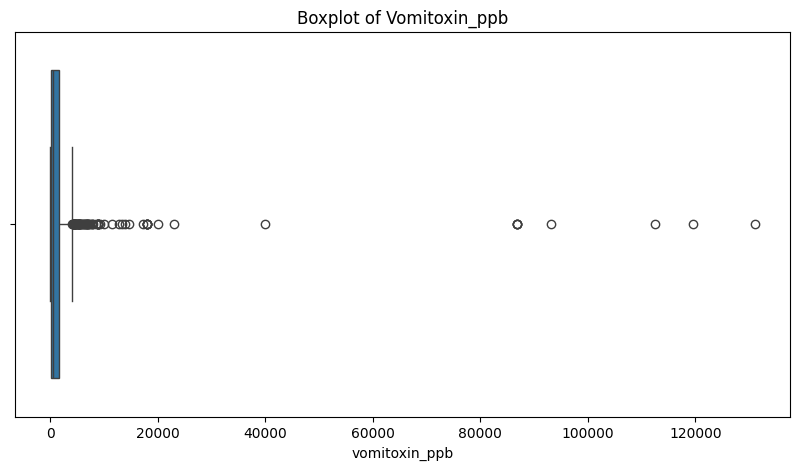

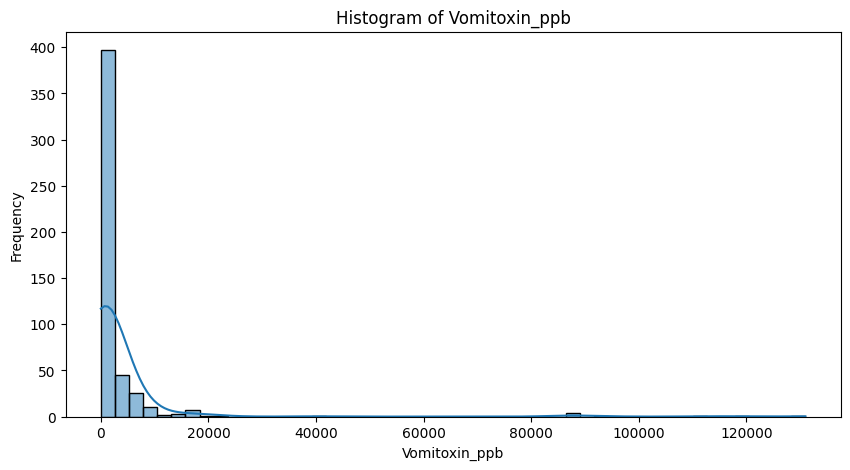

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["vomitoxin_ppb"])
plt.title("Boxplot of Vomitoxin_ppb")
plt.show()

# Histogram for distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["vomitoxin_ppb"], bins=50, kde=True)
plt.title("Histogram of Vomitoxin_ppb")
plt.xlabel("Vomitoxin_ppb")
plt.ylabel("Frequency")
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler

# Selecting spectral columns (0-447)
spectral_data = df.iloc[:, 1:448]  

# Standardizing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(spectral_data)

# Convert back to DataFrame
df_standardized = pd.DataFrame(standardized_data, columns=spectral_data.columns)

# Checking stats after scaling
print(df_standardized.describe())


                  0             1             2             3             4  \
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean  -1.147527e-15 -1.945111e-15  7.549517e-16  1.158185e-15  1.950440e-15   
std    1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   
min   -2.953295e+00 -3.198256e+00 -3.275509e+00 -3.130318e+00 -2.695960e+00   
25%   -7.311204e-01 -8.015584e-01 -8.044148e-01 -8.059657e-01 -8.132349e-01   
50%    1.340111e-01  4.155004e-02  8.763053e-03 -2.277213e-02 -4.221633e-02   
75%    8.310696e-01  8.369734e-01  8.605905e-01  8.435940e-01  8.871796e-01   
max    2.533217e+00  1.966067e+00  2.077084e+00  2.326634e+00  2.048489e+00   

                  5             6             7             8             9  \
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean  -2.700062e-16 -3.215206e-16  1.437073e-15  8.508749e-16 -6.128431e-16   
std    1.001002e+00  1.001002e+00  1.001002e+00  1.

In [9]:
print(df.duplicated().sum())

0


In [10]:
print(df['vomitoxin_ppb'].duplicated().sum()) 

372


In [11]:
Q1 = df['vomitoxin_ppb'].quantile(0.25)
Q3 = df['vomitoxin_ppb'].quantile(0.75)
IQR = Q3 - Q1

# Outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['vomitoxin_ppb'] >= lower_bound) & (df['vomitoxin_ppb'] <= upper_bound)]


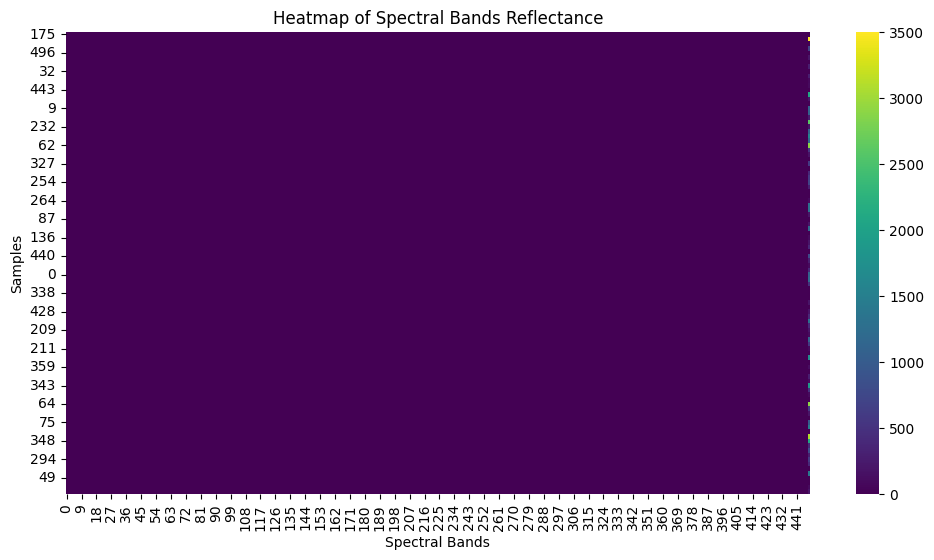

In [14]:
import seaborn as sns

# Select only numeric spectral columns
spectral_columns = df.select_dtypes(include=['number']).columns

# Select a subset of samples (optional: if dataset is large)
df_sample = df[spectral_columns].sample(100, random_state=42)  # Adjust sample size if needed

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_sample, cmap="viridis", cbar=True)
plt.xlabel("Spectral Bands")
plt.ylabel("Samples")
plt.title("Heatmap of Spectral Bands Reflectance")
plt.show()


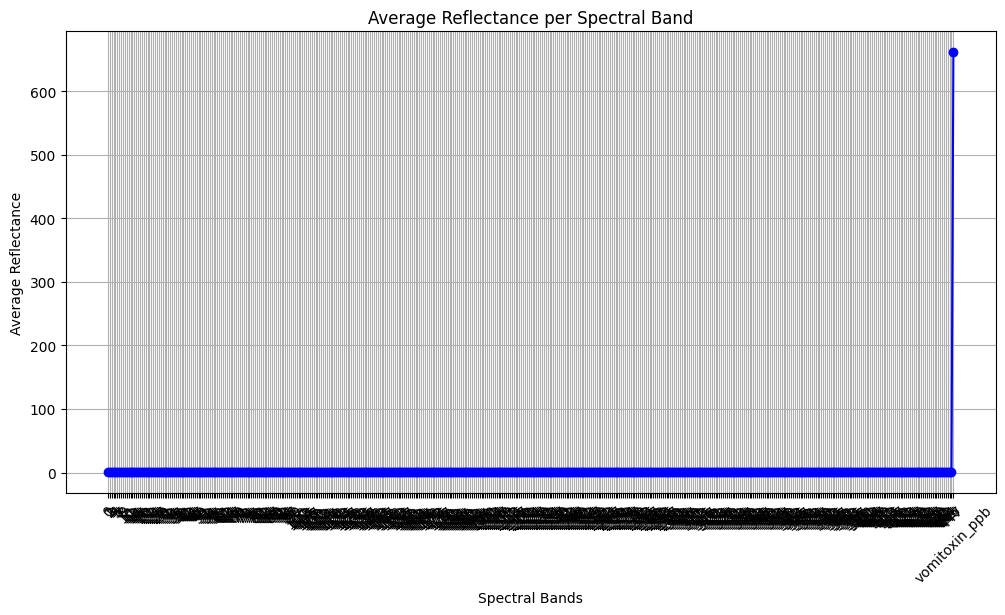

In [15]:
import matplotlib.pyplot as plt

# Select only numeric spectral columns
spectral_columns = df.select_dtypes(include=['number']).columns

# Calculate the average reflectance for each spectral band
average_reflectance = df[spectral_columns].mean()

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(spectral_columns, average_reflectance, marker='o', linestyle='-', color='b')
plt.xlabel("Spectral Bands")
plt.ylabel("Average Reflectance")
plt.title("Average Reflectance per Spectral Band")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)
plt.show()


In [17]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])  # Keep only numerical columns

# Apply PCA
n_components = 10  
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(df_numeric)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_) * 100
print("Explained Variance by Principal Components:\n", explained_variance)


Explained Variance by Principal Components:
 [99.99979323 99.99998405 99.99998928 99.99999198 99.99999338 99.99999376
 99.99999388 99.99999395 99.99999401 99.99999407]


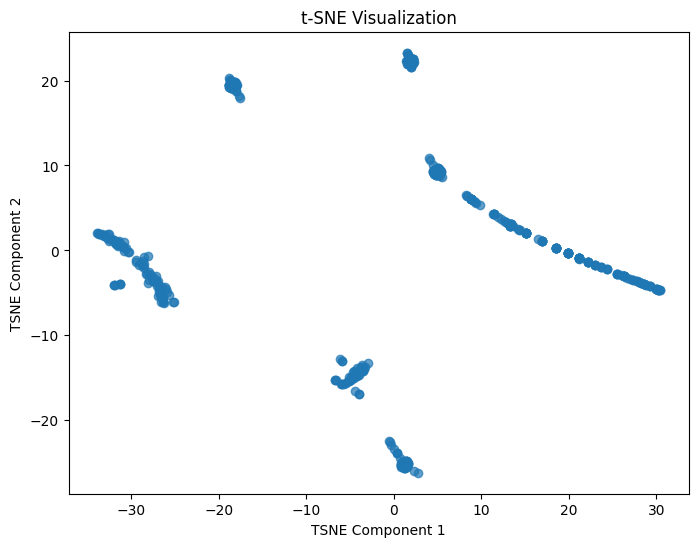

In [18]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_data = tsne.fit_transform(df_numeric)

# Convert to DataFrame for visualization
df_tsne = pd.DataFrame(tsne_data, columns=['TSNE 1', 'TSNE 2'])

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne['TSNE 1'], df_tsne['TSNE 2'], alpha=0.7)
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('t-SNE Visualization')
plt.show()


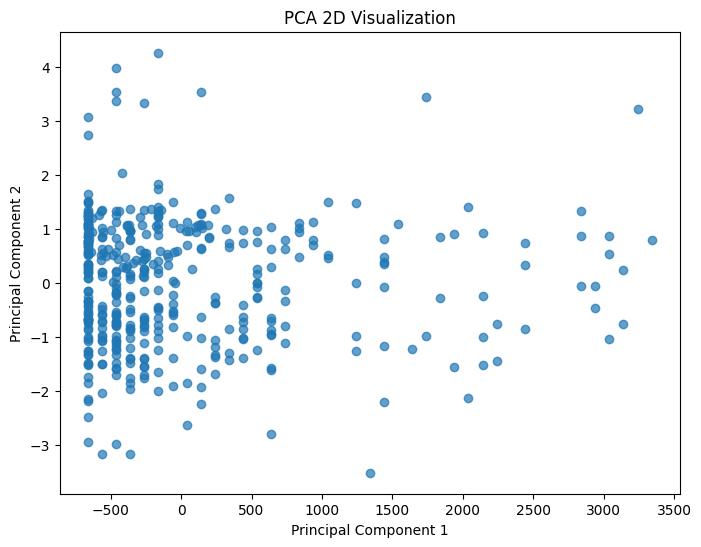

In [19]:
import matplotlib.pyplot as plt

# Take first two principal components for visualization
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Visualization')
plt.show()


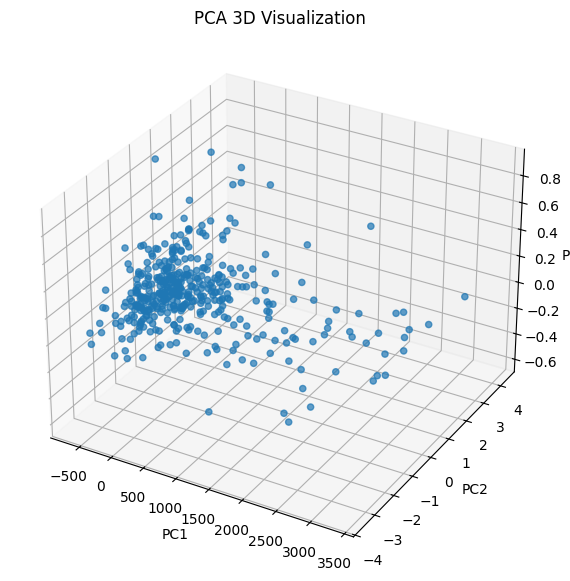

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Visualization')
plt.show()


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Assuming df_numeric contains numerical spectral data and df_labels has class labels
X_train, X_test, y_train, y_test = train_test_split(df_numeric, df_labels, test_size=0.2, random_state=42)

# Reshape input for CNN (samples, time steps, channels)
X_train = X_train.values.reshape(-1, X_train.shape[1], 1)
X_test = X_test.values.reshape(-1, X_test.shape[1], 1)

# Define CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(set(y_train)), activation='softmax')  # Assuming multi-class classification
])

# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


NameError: name 'df_labels' is not defined

In [22]:
print(df.head()) 
print(df.info())

           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

        443       444       445 

In [23]:
df_labels = df["vomitoxin_ppb"]
df_numeric = df.drop(columns=["hsi_id", "vomitoxin_ppb"])

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Assuming df_numeric contains numerical spectral data and df_labels has class labels
X_train, X_test, y_train, y_test = train_test_split(df_numeric, df_labels, test_size=0.2, random_state=42)

# Reshape input for CNN (samples, time steps, channels)
X_train = X_train.values.reshape(-1, X_train.shape[1], 1)
X_test = X_test.values.reshape(-1, X_test.shape[1], 1)

# Define CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(set(y_train)), activation='softmax')  # Assuming multi-class classification
])

# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-11 15:10:51.018415: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 3600 which is outside the valid range of [0, 74).  Label values: 200 0 3100 1200 600 1700 500 100 480 600 320 10 500 0 200 3600 140 100 300 0 300 850 900 860 0 0 700 0 3500 0 90 300
2025-03-11 15:10:51.018434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Received a label value of 3600 which is outside the valid range of [0, 74).  Label values: 200 0 3100 1200 600 1700 500 100 480

InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/traitlets/config/application.py", line 1077, in launch_instance

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/base_events.py", line 1987, in _run_once

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 529, in dispatch_queue

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 518, in process_one

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 424, in dispatch_shell

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 766, in execute_request

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/var/folders/3q/m3jhxf_s2k7fb9hsjymq_xjw0000gn/T/ipykernel_6973/1209340023.py", line 25, in <module>

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 314, in fit

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 117, in one_step_on_iterator

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 104, in one_step_on_data

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/trainer.py", line 316, in compute_loss

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/compile_utils.py", line 609, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/compile_utils.py", line 645, in call

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/losses/loss.py", line 43, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/losses/losses.py", line 22, in call

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/losses/losses.py", line 1722, in sparse_categorical_crossentropy

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/ops/nn.py", line 1567, in sparse_categorical_crossentropy

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py", line 638, in sparse_categorical_crossentropy

Received a label value of 3600 which is outside the valid range of [0, 74).  Label values: 200 0 3100 1200 600 1700 500 100 480 600 320 10 500 0 200 3600 140 100 300 0 300 850 900 860 0 0 700 0 3500 0 90 300
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1426]

In [25]:
import numpy as np

print("Unique labels in training data:", np.unique(y_train))
print("Unique labels in test data:", np.unique(y_test))


Unique labels in training data: [   0.   10.   20.   30.   90.  100.  110.  140.  160.  200.  210.  220.
  244.  250.  270.  280.  290.  300.  320.  340.  370.  380.  400.  410.
  450.  460.  480.  500.  510.  520.  570.  600.  620.  630.  650.  693.
  700.  720.  740.  760.  770.  780.  800.  810.  850.  856.  860.  900.
  980. 1000. 1100. 1200. 1300. 1400. 1500. 1600. 1700. 1900. 2000. 2100.
 2200. 2300. 2400. 2500. 2600. 2700. 2800. 3100. 3500. 3600. 3700. 3800.
 3900. 4000.]
Unique labels in test data: [   0.   80.  100.  130.  180.  200.  260.  300.  390.  400.  410.  500.
  560.  600.  610.  700.  800. 1100. 1200. 1300. 1600. 1700. 1900. 2100.
 2600. 2900. 3500.]


In [26]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Fit on all possible labels (both train and test)
all_labels = np.concatenate([y_train, y_test])
label_encoder.fit(all_labels)

# Transform labels
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# Check unique values after encoding
print("Encoded labels in training data:", np.unique(y_train))
print("Encoded labels in test data:", np.unique(y_test))

# Update num_classes for model
num_classes = len(label_encoder.classes_)


Encoded labels in training data: [ 0  1  2  3  5  6  7  9 10 12 13 14 15 16 18 19 20 21 22 23 24 25 27 28
 29 30 31 32 33 34 36 37 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 75 76 77 78 79
 80 81]
Encoded labels in test data: [ 0  4  6  8 11 12 17 21 26 27 28 32 35 37 38 43 49 57 58 59 62 63 64 66
 71 74 76]


In [27]:
print("Encoded labels in training data:", np.unique(y_train))
print("Encoded labels in test data:", np.unique(y_test))
print("Total classes:", num_classes)


Encoded labels in training data: [ 0  1  2  3  5  6  7  9 10 12 13 14 15 16 18 19 20 21 22 23 24 25 27 28
 29 30 31 32 33 34 36 37 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 75 76 77 78 79
 80 81]
Encoded labels in test data: [ 0  4  6  8 11 12 17 21 26 27 28 32 35 37 38 43 49 57 58 59 62 63 64 66
 71 74 76]
Total classes: 82


In [28]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10


2025-03-11 15:12:20.129332: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 81 which is outside the valid range of [0, 74).  Label values: 0 0 12 12 32 0 43 0 56 6 12 32 32 32 18 12 6 37 7 10 77 59 27 58 81 0 47 21 0 0 54 0
2025-03-11 15:12:20.129356: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Received a label value of 81 which is outside the valid range of [0, 74).  Label values: 0 0 12 12 32 0 43 0 56 6 12 32 32 32 18 12 6 37 7 10 77 59 27 58 81 0 47 21 0 0 54 0
	 [[{{function_node __inference_one_step_on_data_1927}}{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/traitlets/config/application.py", line 1077, in launch_instance

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/base_events.py", line 1987, in _run_once

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 529, in dispatch_queue

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 518, in process_one

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 424, in dispatch_shell

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 766, in execute_request

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/var/folders/3q/m3jhxf_s2k7fb9hsjymq_xjw0000gn/T/ipykernel_6973/69152766.py", line 1, in <module>

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 314, in fit

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 117, in one_step_on_iterator

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 104, in one_step_on_data

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/trainer.py", line 316, in compute_loss

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/compile_utils.py", line 609, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/compile_utils.py", line 645, in call

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/losses/loss.py", line 43, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/losses/losses.py", line 22, in call

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/losses/losses.py", line 1722, in sparse_categorical_crossentropy

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/ops/nn.py", line 1567, in sparse_categorical_crossentropy

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py", line 638, in sparse_categorical_crossentropy

Received a label value of 81 which is outside the valid range of [0, 74).  Label values: 0 0 12 12 32 0 43 0 56 6 12 32 32 32 18 12 6 37 7 10 77 59 27 58 81 0 47 21 0 0 54 0
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1982]

In [29]:
print("Unique labels in y_train after encoding:", np.unique(y_train))
print("Expected range: 0 to", num_classes - 1)


Unique labels in y_train after encoding: [ 0  1  2  3  5  6  7  9 10 12 13 14 15 16 18 19 20 21 22 23 24 25 27 28
 29 30 31 32 33 34 36 37 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 75 76 77 78 79
 80 81]
Expected range: 0 to 81


In [31]:
# Find the classes present in y_train
train_classes = set(np.unique(y_train))

# Filter y_test and corresponding X_test
valid_indices = [i for i, label in enumerate(y_test) if label in train_classes]
X_test = X_test[valid_indices]
y_test = y_test[valid_indices]

# Re-encode labels again
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [32]:
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))
print("Number of classes:", len(label_encoder.classes_))


Unique labels in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
Unique labels in y_test: [ 0  4  6  8 11 12 17 21 26 27 28 32 35 37 38 43 49 57 58 59 62 63 64 66
 71]
Number of classes: 74


In [33]:
# Ensure y_test contains only labels seen in y_train
train_classes = set(np.unique(y_train))  # Labels present in y_train

# Get indices of valid labels in y_test
valid_indices = [i for i, label in enumerate(y_test) if label in train_classes]

# Filter X_test and y_test accordingly
X_test = X_test[valid_indices]
y_test = y_test[valid_indices]

# Recheck unique labels
print("Fixed labels in y_test:", np.unique(y_test))


Fixed labels in y_test: [ 0  4  6  8 11 12 17 21 26 27 28 32 35 37 38 43 49 57 58 59 62 63 64 66
 71]


In [34]:
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))


Unique labels in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
Unique labels in y_test: [ 0  4  6  8 11 12 17 21 26 27 28 32 35 37 38 43 49 57 58 59 62 63 64 66
 71]


In [35]:
model.fit(X_train, y_train)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1113 - loss: 4.2655     


In [38]:
y_pred_labels = np.argmax(y_pred, axis=1)  # Sabse bada probability wala class select karega
accuracy = accuracy_score(y_test, y_pred_labels)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.2839506172839506


In [39]:
pip install tensorflow



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: /Library/Frameworks/Python.framework/Versions/3.12/bin/python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Define CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(74, activation='softmax')  # 74 classes
])

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 448, 1), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (None, 448, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 448, 1), dtype=float32)
  • training=True
  • mask=None

In [41]:
print(X_train.shape, X_test.shape)


(336, 448, 1) (81, 448, 1)


In [42]:
import numpy as np

X_train = np.repeat(X_train, 3, axis=-1)  # Convert (448, 1) → (448, 3)
X_test = np.repeat(X_test, 3, axis=-1)


In [43]:
import tensorflow as tf

X_train = tf.image.resize(X_train, (224, 224)).numpy()
X_test = tf.image.resize(X_test, (224, 224)).numpy()


In [44]:
print(X_train.shape, X_test.shape)  # Expected: (336, 224, 224, 3) (81, 224, 224, 3)


(224, 224, 3) (224, 224, 3)


In [45]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 224
'y' sizes: 336


In [46]:
print(X_train.shape, y_train.shape)  # Check sizes
print(X_test.shape, y_test.shape)

(224, 224, 3) (336,)
(224, 224, 3) (81,)


In [47]:
import tensorflow as tf

# Resize only if needed
if X_train.shape[0] != y_train.shape[0]:
    X_train = X_train[:y_train.shape[0]]
if X_test.shape[0] != y_test.shape[0]:
    X_test = X_test[:y_test.shape[0]]

print(X_train.shape, y_train.shape)  # Should match


(224, 224, 3) (336,)


In [48]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 224
'y' sizes: 336


In [49]:
min_train = min(X_train.shape[0], y_train.shape[0])
min_test = min(X_test.shape[0], y_test.shape[0])


In [50]:
X_train = X_train[:min_train]
y_train = y_train[:min_train]

X_test = X_test[:min_test]
y_test = y_test[:min_test]

print(X_train.shape, y_train.shape)  # Should match
print(X_test.shape, y_test.shape)


(224, 224, 3) (224,)
(81, 224, 3) (81,)


In [51]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 224, 3), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (32, 224, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 224, 3), dtype=float32)
  • training=True
  • mask=None

In [52]:
print(X_train.shape)

(224, 224, 3)


In [53]:
import numpy as np

# If grayscale, expand dimensions
if X_train.shape[-1] != 3:
    X_train = np.expand_dims(X_train, axis=-1)  # (samples, 224, 224, 1)
    X_train = np.repeat(X_train, 3, axis=-1)  # Convert to (samples, 224, 224, 3)

if X_test.shape[-1] != 3:
    X_test = np.expand_dims(X_test, axis=-1)
    X_test = np.repeat(X_test, 3, axis=-1)

print(X_train.shape)  # Now should be (samples, 224, 224, 3)
print(X_test.shape)


(224, 224, 3)
(81, 224, 3)


In [54]:
import numpy as np

# Ensure X_train and X_test are NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Reshape if necessary
if len(X_train.shape) == 3:  # If single image shape (224, 224, 3), reshape it
    X_train = X_train.reshape((-1, 224, 224, 3))

if len(X_test.shape) == 3:  
    X_test = X_test.reshape((-1, 224, 224, 3))

# Check shapes
print("X_train shape:", X_train.shape)  # Expected: (num_samples, 224, 224, 3)
print("X_test shape:", X_test.shape)

# Ensure y_train and y_test are also correctly shaped
y_train = np.array(y_train).reshape(-1)  # Convert to (num_samples,)
y_test = np.array(y_test).reshape(-1)

print("y_train shape:", y_train.shape)  # Expected: (num_samples,)
print("y_test shape:", y_test.shape)


ValueError: cannot reshape array of size 54432 into shape (224,224,3)

In [55]:
print("Original shape of X_test:", X_test.shape)

Original shape of X_test: (81, 224, 3)


In [56]:
import tensorflow as tf
import numpy as np

# Ensure X_train and X_test are NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Resize images to (224, 224, 3) if needed
X_train = tf.image.resize(X_train, (224, 224)).numpy()
X_test = tf.image.resize(X_test, (224, 224)).numpy()

# Ensure correct shape
X_train = X_train.reshape(-1, 224, 224, 3)
X_test = X_test.reshape(-1, 224, 224, 3)

# Ensure y_train and y_test are also correctly shaped
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

print("Final X_train shape:", X_train.shape)  # Expected: (num_samples, 224, 224, 3)
print("Final X_test shape:", X_test.shape)
print("Final y_train shape:", y_train.shape)  # Expected: (num_samples,)
print("Final y_test shape:", y_test.shape)


Final X_train shape: (1, 224, 224, 3)
Final X_test shape: (1, 224, 224, 3)
Final y_train shape: (224,)
Final y_test shape: (81,)


In [57]:
import tensorflow as tf
import numpy as np

# Ensure X_train and X_test are NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Resize images correctly
X_train = np.array([tf.image.resize(img, (224, 224)).numpy() for img in X_train])
X_test = np.array([tf.image.resize(img, (224, 224)).numpy() for img in X_test])

# Ensure correct shape
print("Resized X_train shape:", X_train.shape)  # Should be (num_samples, 224, 224, 3)
print("Resized X_test shape:", X_test.shape)

# Convert y_train and y_test to NumPy and reshape if needed
y_train = np.array(y_train)
y_test = np.array(y_test)

print("Final y_train shape:", y_train.shape)  # Expected: (num_samples,)
print("Final y_test shape:", y_test.shape)


Resized X_train shape: (1, 224, 224, 3)
Resized X_test shape: (1, 224, 224, 3)
Final y_train shape: (224,)
Final y_test shape: (81,)


In [59]:
import tensorflow as tf
import numpy as np

# Ensure X_train and X_test are NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# If X_train/X_test is grayscale (1 channel), convert to RGB (3 channels)
if X_train.shape[-1] == 1:
    X_train = np.repeat(X_train, 3, axis=-1)  # Convert (h, w, 1) → (h, w, 3)

if X_test.shape[-1] == 1:
    X_test = np.repeat(X_test, 3, axis=-1)

# Ensure X_train is in the correct format: (num_samples, height, width, channels)
if len(X_train.shape) == 3:  
    X_train = np.expand_dims(X_train, axis=0)  # Convert (h, w, c) → (1, h, w, c)

if len(X_test.shape) == 3:  
    X_test = np.expand_dims(X_test, axis=0)

# Now resize correctly
X_train_resized = np.array([tf.image.resize(img, (224, 224)).numpy() for img in X_train])
X_test_resized = np.array([tf.image.resize(img, (224, 224)).numpy() for img in X_test])

# Ensure labels are NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Final shape check
print("Final X_train shape:", X_train_resized.shape)  # Expected: (num_samples, 224, 224, 3)
print("Final X_test shape:", X_test_resized.shape)
print("Final y_train shape:", y_train.shape)  # Expected: (num_samples,)
print("Final y_test shape:", y_test.shape)


Final X_train shape: (1, 224, 224, 3)
Final X_test shape: (1, 224, 224, 3)
Final y_train shape: (224,)
Final y_test shape: (81,)


In [60]:
import tensorflow as tf
import numpy as np

# Ensure X_train and X_test are NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# If grayscale, convert to RGB (3 channels)
if X_train.shape[-1] == 1:
    X_train = np.repeat(X_train, 3, axis=-1)

if X_test.shape[-1] == 1:
    X_test = np.repeat(X_test, 3, axis=-1)

# Ensure 4D shape: (num_samples, height, width, channels)
if len(X_train.shape) == 3:
    X_train = np.expand_dims(X_train, axis=0)

if len(X_test.shape) == 3:
    X_test = np.expand_dims(X_test, axis=0)

# Check number of samples
num_samples = y_train.shape[0]  # Expected number of images

# Reshape X_train properly
X_train_resized = np.array([tf.image.resize(img, (224, 224)).numpy() for img in X_train])

# Fix issue: Ensure X_train has the correct number of samples
if X_train_resized.shape[0] != num_samples:
    X_train_resized = np.tile(X_train_resized, (num_samples, 1, 1, 1))  # Duplicate single image

# Resize X_test properly
X_test_resized = np.array([tf.image.resize(img, (224, 224)).numpy() for img in X_test])

# Ensure labels are NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Final shape check
print("Final X_train shape:", X_train_resized.shape)  # Expected: (num_samples, 224, 224, 3)
print("Final X_test shape:", X_test_resized.shape)
print("Final y_train shape:", y_train.shape)  # Expected: (num_samples,)
print("Final y_test shape:", y_test.shape)


Final X_train shape: (224, 224, 224, 3)
Final X_test shape: (1, 224, 224, 3)
Final y_train shape: (224,)
Final y_test shape: (81,)


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Get Predictions
predictions = model.predict(X_test)  # Probabilities
predicted_classes = np.argmax(predictions, axis=1)  # Convert to class labels

# 2. Ensure Labels Are Numeric
y_test_numeric = np.array(y_test)  # Convert y_test to numeric if needed

# 3. Compute Regression Metrics
mae = mean_absolute_error(y_test_numeric, predicted_classes)
rmse = np.sqrt(mean_squared_error(y_test_numeric, predicted_classes))
r2 = r2_score(y_test_numeric, predicted_classes)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# 4. Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_numeric, predicted_classes, alpha=0.6, edgecolors='k')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Actual vs Predicted Values")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


ValueError: Found input variables with inconsistent numbers of samples: [81, 1]

In [62]:
print(predicted_classes.shape, y_test_numeric.shape)


(1,) (81,)


In [63]:
print(X_test.shape)

(1, 224, 224, 3)


In [64]:
y_pred_prob = model.predict(X_test)  # Get softmax probabilities
y_pred_classes = np.argmax(y_pred_prob, axis=1)  # Convert to labels

print(y_pred_classes.shape)  # Should match y_test shape

# Reshape y_test if needed
y_test_numeric = y_test_numeric[: y_pred_classes.shape[0]]

# Compute metrics
mae = mean_absolute_error(y_test_numeric, y_pred_classes)
rmse = np.sqrt(mean_squared_error(y_test_numeric, y_pred_classes))
r2 = r2_score(y_test_numeric, y_pred_classes)

print(f"MAE: {mae}, RMSE: {rmse}, R² Score: {r2}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
(1,)
MAE: 0.0, RMSE: 0.0, R² Score: nan


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


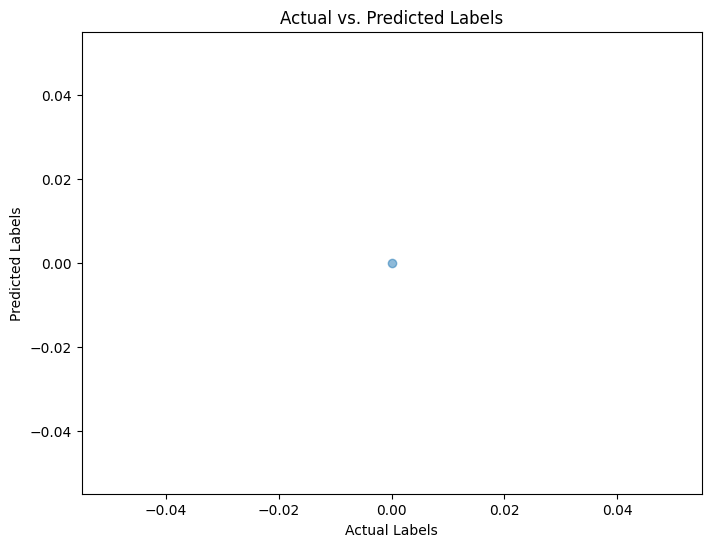

In [65]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test_numeric, y_pred_classes, alpha=0.5)
plt.plot([min(y_test_numeric), max(y_test_numeric)], 
         [min(y_test_numeric), max(y_test_numeric)], 
         color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Actual vs. Predicted Labels")
plt.show()
